<a href="https://colab.research.google.com/github/cartmarsh/MachineLearning1/blob/main/HumanProteinAtlasDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os

In [4]:
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [7]:
!kaggle competitions download -c human-protein-atlas-image-classification

100% 17.5G/17.5G [02:28<00:00, 148MB/s]
100% 17.5G/17.5G [02:28<00:00, 126MB/s]


In [8]:
!ls

human-protein-atlas-image-classification.zip  kaggle.json  sample_data


# Outline

1. Explore data
2. transform data
2. create DataSet
3. create DataLoader
4. create Model
5. make Submisson file
6. submit

## Exploring the data

In [9]:
!unzip human-protein-atlas-image-classification.zip   --quiet

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: train/f5b629aa-bbbb-11e8-b2ba-ac1f6b6435d0_blue.png  
  inflating: train/f5b629aa-bbbb-11e8-b2ba-ac1f6b6435d0_green.png  
  inflating: train/f5b629aa-bbbb-11e8-b2ba-ac1f6b6435d0_red.png  
  inflating: train/f5b629aa-bbbb-11e8-b2ba-ac1f6b6435d0_yellow.png  
  inflating: train/f5b6f5c0-bbc4-11e8-b2bc-ac1f6b6435d0_blue.png  
  inflating: train/f5b6f5c0-bbc4-11e8-b2bc-ac1f6b6435d0_green.png  
  inflating: train/f5b6f5c0-bbc4-11e8-b2bc-ac1f6b6435d0_red.png  
  inflating: train/f5b6f5c0-bbc4-11e8-b2bc-ac1f6b6435d0_yellow.png  
  inflating: train/f5baae8e-bbc1-11e8-b2bb-ac1f6b6435d0_blue.png  
  inflating: train/f5baae8e-bbc1-11e8-b2bb-ac1f6b6435d0_green.png  
  inflating: train/f5baae8e-bbc1-11e8-b2bb-ac1f6b6435d0_red.png  
  inflating: train/f5baae8e-bbc1-11e8-b2bb-ac1f6b6435d0_yellow.png  
  inflating: train/f5c09c38-bbc4-11e8-b2bc-ac1f6b6435d0_blue.png  
  inflating: train/f5c09c38-bbc4-11e8-b2bc-ac1f6b6435d0_

In [10]:
!ls

human-protein-atlas-image-classification.zip  sample_submission.csv  train.csv
kaggle.json				      test
sample_data				      train


In [14]:
import pandas as pd

train_df = pd.read_csv("train.csv", index_col="Id")
train_df.head(10)

,Target
Id,
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0,0
0020af02-bbba-11e8-b2ba-ac1f6b6435d0,25 2
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0,0
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0,2 0


In [16]:
train_df["Target"] = train_df["Target"].str.split(" ").map(lambda x: list(map(int, x)))

In [17]:
train_df.head(10)

,Target
Id,
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"[16, 0]"
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]"
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,[5]
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,[1]
001838f8-bbca-11e8-b2bc-ac1f6b6435d0,[18]
001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0,[0]
0020af02-bbba-11e8-b2ba-ac1f6b6435d0,"[25, 2]"
002679c2-bbb6-11e8-b2ba-ac1f6b6435d0,[0]
00285ce4-bba0-11e8-b2b9-ac1f6b6435d0,"[2, 0]"


In [18]:
label_names = ["Nucleoplasm", "Nuclear membrane", "Nucleoli", "Nucleoli fibrillar center", 
               "Nuclear speckles", "Nuclear bodies", "Endoplasmic reticulum", 
               "Golgi apparatus", "Peroxisomes", "Endosomes","Lysosomes", 
               "Intermediate filaments", "Actin filaments", "Focal adhesion sites", 
               "Microtubules", "Microtubule ends", "Cytokinetic bridge", "Mitotic spindle", 
               "Microtubule organizing center", "Centrosome", "Lipid droplets", 
               "Plasma membrane", "Cell junctions", "Mitochondria", "Aggresome",   
               "Cytosol", "Cytoplasmic bodies", "Rods & rings"]

Creating frequencies

In [19]:
import numpy as np

def get_label_freqs(targets, label_names, ascending=None):
    n_classes = len(label_names)
    freqs = np.array([0] * n_classes)
    for lst in targets:
        for c in range(n_classes):
            freqs[c] += c in lst
    data = {
        'name': label_names, 
        'frequency': freqs, 
        'percent': (10000 * freqs / len(targets)).astype(int) / 100.,
    }
    cols = ['name', 'frequency', 'percent']
    df = pd.DataFrame(data, columns=cols)
    if ascending is not None:
        df = df.sort_values(by='frequency', ascending=ascending)
    return df

In [22]:
# Create a frequency table
train_freqs = get_label_freqs(train_df.Target, label_names, ascending=False)
train_freqs

,name,frequency,percent
0,Nucleoplasm,12885,41.46
25,Cytosol,8228,26.48
21,Plasma membrane,3777,12.15
2,Nucleoli,3621,11.65
23,Mitochondria,2965,9.54
7,Golgi apparatus,2822,9.08
5,Nuclear bodies,2513,8.08
4,Nuclear speckles,1858,5.97
3,Nucleoli fibrillar center,1561,5.02
19,Centrosome,1482,4.76


/bin/bash: line 0: cd: /train: No such file or directory


In [29]:
TRAIN_DIR = "/train"

In [40]:
# Better approach: use pathlib
from pathlib import Path

DATA_DIR = Path('./')
TRAIN_DIR = DATA_DIR/'train'
TEST_DIR = DATA_DIR/'test'

In [41]:
CHANNELS = ['green', 'red', 'blue', 'yellow']

# Load images for multiple channels
def load_image(image_id, channels=CHANNELS, img_dir=TRAIN_DIR):
    image = np.zeros(shape=(len(channels),512,512))
    for i, ch in enumerate(channels):
        image[i,:,:] = imread(str(img_dir/f'{image_id}_{ch}.png'))
    return image

In [42]:
# Plot multiple images in a grid
def show_image_filters(image, title, figsize=(16,5)):
    fig, subax = plt.subplots(1, 4, figsize=figsize)
    # Green channel
    subax[0].imshow(image[0], cmap="Greens")
    subax[0].set_title(title)
    # Red channel
    subax[1].imshow(image[1], cmap="Reds")
    subax[1].set_title("Microtubules")
    # Blue channel
    subax[2].imshow(image[2], cmap="Blues")
    subax[2].set_title("Nucleus")
    # Orange channel
    subax[3].imshow(image[3], cmap="Oranges")
    subax[3].set_title("Endoplasmatic reticulum")
    return subax

In [43]:
# Use the traning data to show appropriate labels
def get_labels(image_id):
    labels = [label_names[x] for x in train_df.loc[image_id]['Target']]
    return ', '.join(labels)

(4, 512, 512)


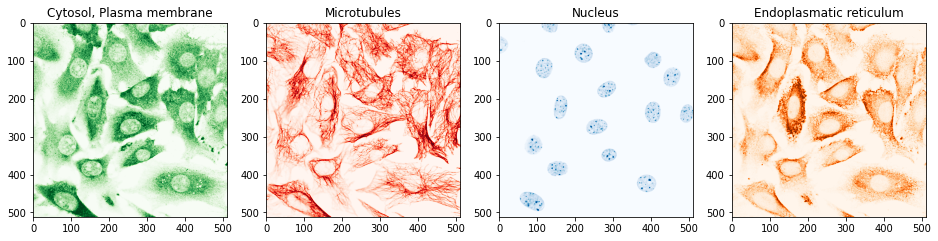

In [44]:
from imageio import imread
import matplotlib.pyplot as plt

# Look at a sample grid
img_id = 'ac39847a-bbb1-11e8-b2ba-ac1f6b6435d0'
img, title = load_image(img_id), get_labels(img_id)
show_image_filters(img, title);
print(img.shape)

In [46]:
!pwd

/content


In [66]:
import os


def get_unique_ids2(path):
  # Pfad des Ordners, durch den du iterieren möchtest
  folder_path = path

  # Leere Liste, um die eindeutigen IDs zu speichern
  unique_ids = []

  # Iteriere über die Dateinamen im Ordner
  for filename in os.listdir(folder_path):
    # Extraktion der ID aus dem Dateinamen
    file_id = filename.split('/')[-1].split('_')[0]
    
    # Hinzufügen der ID zur Liste, falls sie noch nicht enthalten ist
    if file_id not in unique_ids:
      unique_ids.append(file_id)

  # Ausgabe der Liste mit den eindeutigen IDs
  
  df = pd.DataFrame({'ids': unique_ids})
  print(df)
  return df

In [67]:
df1 = get_unique_ids2("/content/test")




                                        ids
0      0f92e1bc-bad4-11e8-b2b8-ac1f6b6435d0
1      2745a95e-bac8-11e8-b2b7-ac1f6b6435d0
2      49e04782-bad0-11e8-b2b8-ac1f6b6435d0
3      9b6a93f6-bac5-11e8-b2b7-ac1f6b6435d0
4      5bef2268-bac6-11e8-b2b7-ac1f6b6435d0
...                                     ...
11697  62353cd4-bad5-11e8-b2b9-ac1f6b6435d0
11698  d5d4433c-bacc-11e8-b2b8-ac1f6b6435d0
11699  8cbb27a0-bac8-11e8-b2b8-ac1f6b6435d0
11700  ce3def66-bacb-11e8-b2b8-ac1f6b6435d0
11701  41f95ed4-bad3-11e8-b2b8-ac1f6b6435d0

[11702 rows x 1 columns]


In [68]:
type(df1)

pandas.core.frame.DataFrame

In [69]:


# Ausgabe des DataFrames
print(df1)

                                        ids
0      0f92e1bc-bad4-11e8-b2b8-ac1f6b6435d0
1      2745a95e-bac8-11e8-b2b7-ac1f6b6435d0
2      49e04782-bad0-11e8-b2b8-ac1f6b6435d0
3      9b6a93f6-bac5-11e8-b2b7-ac1f6b6435d0
4      5bef2268-bac6-11e8-b2b7-ac1f6b6435d0
...                                     ...
11697  62353cd4-bad5-11e8-b2b9-ac1f6b6435d0
11698  d5d4433c-bacc-11e8-b2b8-ac1f6b6435d0
11699  8cbb27a0-bac8-11e8-b2b8-ac1f6b6435d0
11700  ce3def66-bacb-11e8-b2b8-ac1f6b6435d0
11701  41f95ed4-bad3-11e8-b2b8-ac1f6b6435d0

[11702 rows x 1 columns]


In [50]:
len(list(set([str(fn).split('/')[-1].split('_')[0] for fn in TEST_DIR.iterdir()])))

11702